# French Energy Consumption
## Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("consommation-regionale-cleaned.csv", delimiter=',')

In [5]:
# basic stats

print(data.describe())

       Unnamed: 0        annee  code_insee_region  consommation_kwh_pcs  \
count   108.00000   108.000000         108.000000          1.080000e+02   
mean     53.50000  2018.000000          49.916667          1.274411e+08   
std      31.32092     2.594026          25.759537          1.432878e+08   
min       0.00000  2014.000000          11.000000          6.886934e+06   
25%      26.75000  2016.000000          27.750000          2.166226e+07   
50%      53.50000  2018.000000          48.000000          1.136750e+08   
75%      80.25000  2020.000000          75.250000          1.669343e+08   
max     107.00000  2022.000000          93.000000          1.019229e+09   

       consommation_gwh_pcs  
count            108.000000  
mean             127.441119  
std              143.287836  
min                6.886934  
25%               21.662257  
50%              113.675023  
75%              166.934303  
max             1019.229306  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            108 non-null    int64  
 1   annee                 108 non-null    int64  
 2   code_insee_region     108 non-null    int64  
 3   region                108 non-null    object 
 4   consommation_kwh_pcs  108 non-null    float64
 5   consommation_gwh_pcs  108 non-null    float64
 6   geom                  108 non-null    object 
 7   centroid              108 non-null    object 
 8   date                  108 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 7.7+ KB
None


In [9]:
# calculate the yearly gaz consumption

gaz_yearly_consu = data.groupby('annee')['consommation_gwh_pcs'].sum().sort_values(ascending=False)
print(f'Gaz Yearly consumption: {gaz_yearly_consu}')

Gaz Yearly consumption: annee
2022    2967.576786
2021    2352.640132
2020    1637.124468
2019    1496.147838
2018    1299.460865
2017    1083.019596
2016    1012.884784
2015     972.236938
2014     942.549448
Name: consommation_gwh_pcs, dtype: float64


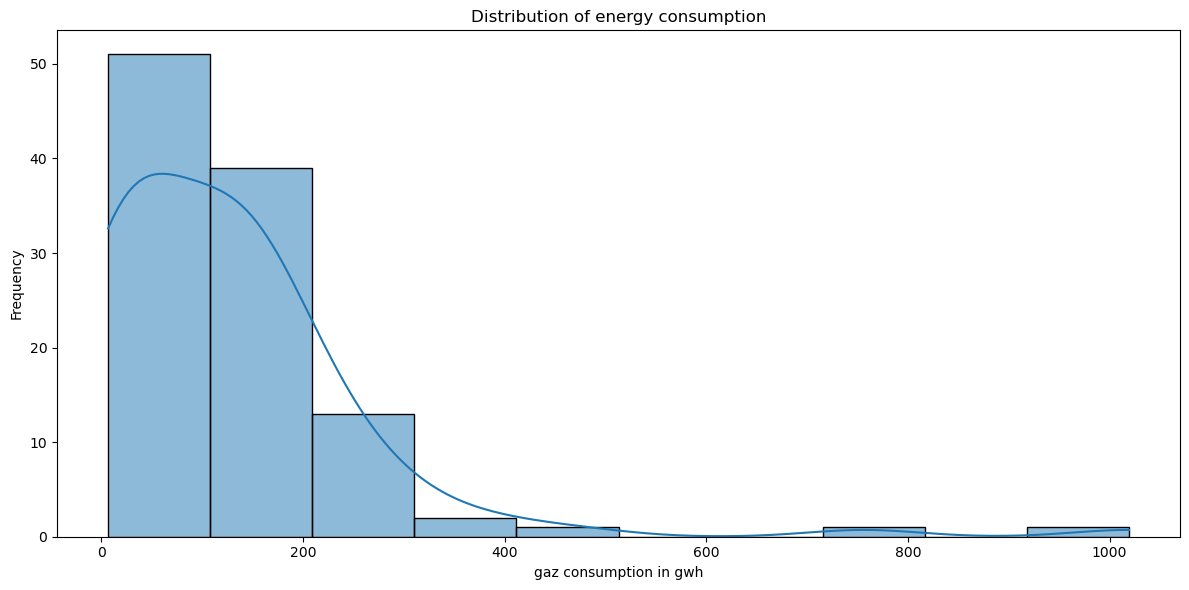

In [13]:
#distribution of energy consumption

plt.figure(figsize=(12,6))
sns.histplot(data['consommation_gwh_pcs'], bins=10, kde= True)
plt.title('Distribution of energy consumption')
plt.xlabel('gaz consumption in gwh')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

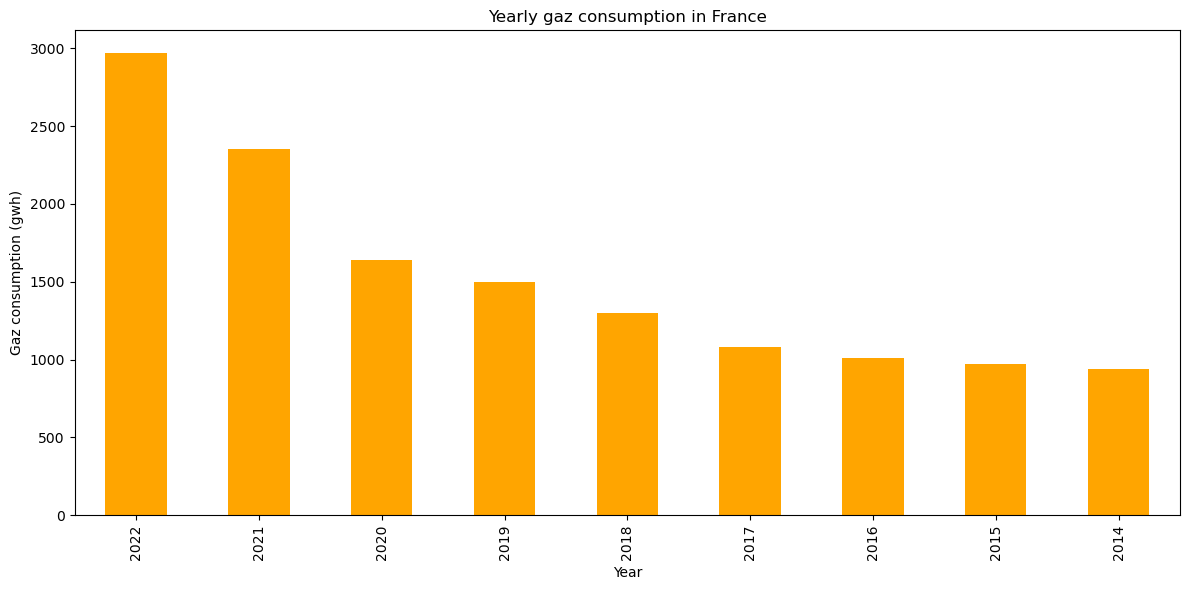

In [46]:
# plot the yearly gaz consumption

plt.figure(figsize=(12,6))
gaz_yearly_consu.plot(kind='bar',color='orange')
plt.title('Yearly gaz consumption in France')
plt.xlabel('Year')
plt.ylabel('Gaz consumption (gwh)')
plt.tight_layout()
plt.show()

In [19]:
# top 5 regions by total gaz consumption
top_regions_gaz = data.groupby('region')['consommation_gwh_pcs'].sum().sort_values(ascending=False)
print(f'Top 5 regions with the highest gaz consumption: {top_regions_gaz}')

Top 5 regions with the highest gaz consumption: region
Île-de-France                 3731.379472
Hauts-de-France               1999.970924
Auvergne-Rhône-Alpes          1474.006830
Nouvelle-Aquitaine            1463.093356
Pays de la Loire              1343.916144
Occitanie                     1273.834770
Grand Est                     1244.995358
Provence-Alpes-Côte d'Azur     363.049403
Bretagne                       343.350402
Bourgogne-Franche-Comté        264.142686
Normandie                      153.523802
Centre-Val de Loire            108.377709
Name: consommation_gwh_pcs, dtype: float64


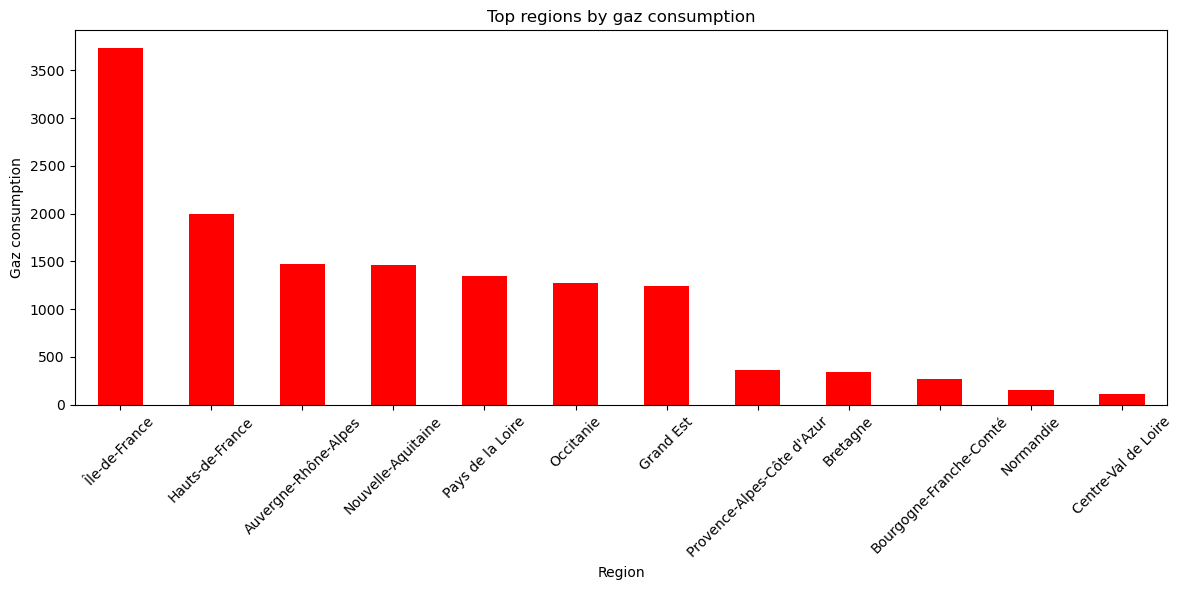

In [43]:
# plot average growth rates
plt.figure(figsize=(12,6))
top_regions_gaz.plot(kind='bar', color='red')
plt.title('Top regions by gaz consumption')
plt.xlabel('Region')
plt.ylabel('Gaz consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

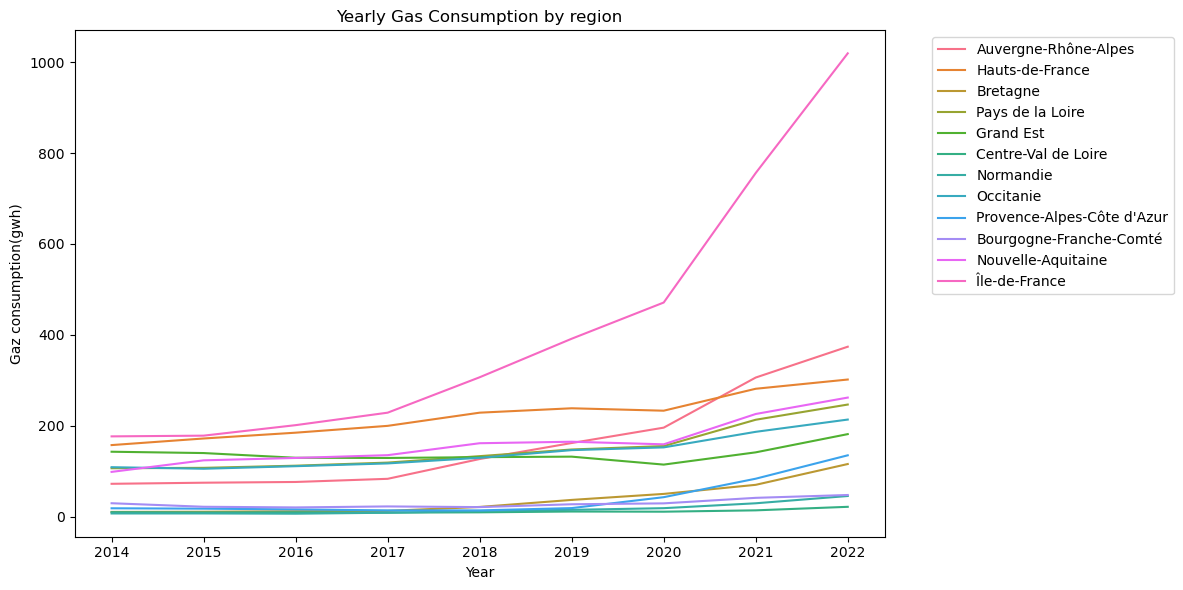

In [25]:
# gaz consumption

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='annee',y='consommation_gwh_pcs', hue='region')
plt.title('Yearly Gas Consumption by region')
plt.xlabel('Year')
plt.ylabel('Gaz consumption(gwh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

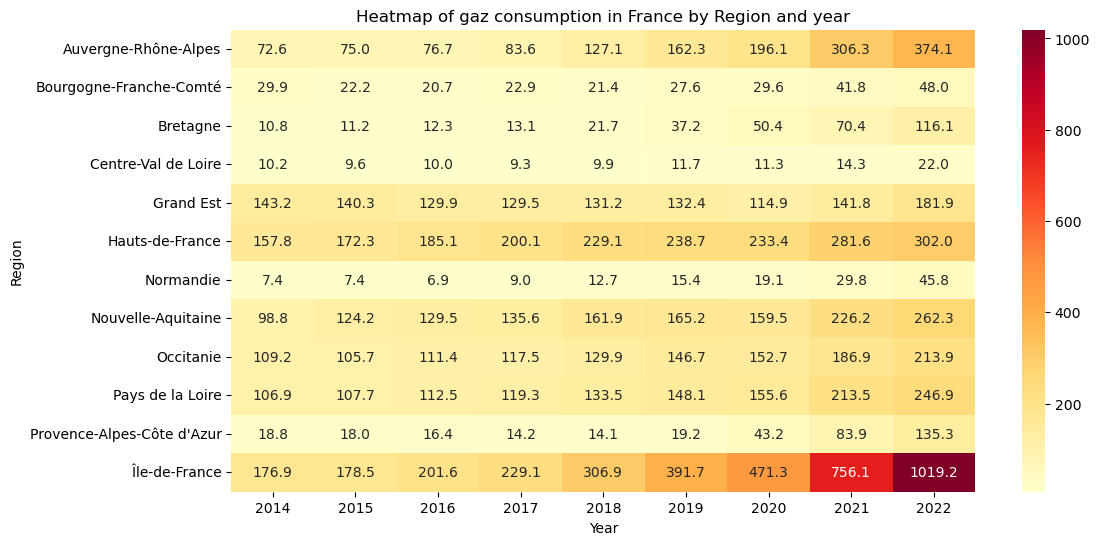

In [32]:
# heatmap of gaz consumption by region and year

pivot_data = data.pivot(index='region', columns='annee',values='consommation_gwh_pcs')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title("Heatmap of gaz consumption in France by Region and year")
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

In [33]:
# year over year growth rate
data_sorted = data.sort_values(['region','annee'])
data_sorted['growth_rate'] = data_sorted.groupby('region')['consommation_gwh_pcs'].pct_change()

In [36]:
# average growth rate by region

avg_growth_rate = data_sorted.groupby('region')['growth_rate'].mean().sort_values(ascending=False)
print(f'Average consumption Growth rate by region:{avg_growth_rate}')

Average consumption Growth rate by region:region
Bretagne                      0.371439
Provence-Alpes-Côte d'Azur    0.361435
Normandie                     0.274862
Île-de-France                 0.255759
Auvergne-Rhône-Alpes          0.241766
Nouvelle-Aquitaine            0.137986
Centre-Val de Loire           0.116158
Pays de la Loire              0.115070
Occitanie                     0.090137
Hauts-de-France               0.086347
Bourgogne-Franche-Comté       0.079815
Grand Est                     0.038717
Name: growth_rate, dtype: float64


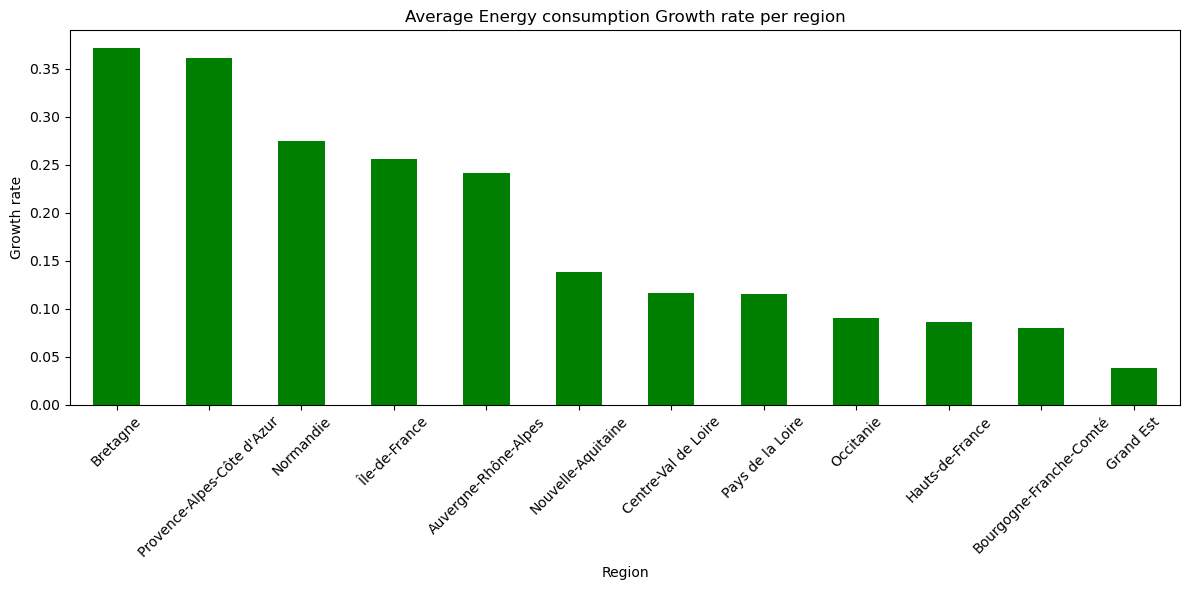

In [41]:
# plot average growth rates
plt.figure(figsize=(12,6))
avg_growth_rate.plot(kind='bar', color='green')
plt.title('Average Energy consumption Growth rate per region')
plt.xlabel('Region')
plt.ylabel('Growth rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()